In [28]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
df = pd.read_csv('Customers_data.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
# Check missing value
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Find the differences between male and female
female = df[df['Gender'] == 'Female']
male = df[df['Gender'] == 'Male']

print ('Female')
print ('Female Age Mean:', female['Age'].mean())
print ('Female Annual Income Mean (k$):', female['Annual Income (k$)'].mean())
print ('Female spending Score (1-100):', female['Spending Score (1-100)'].mean())
print()
print ('Male')
print ('Male Age Mean:', male['Age'].mean())
print ('Male Annual Income Mean (k$):', male['Annual Income (k$)'].mean())
print ('Male spending Score (1-100):', male['Spending Score (1-100)'].mean())

Female
Female Age Mean: 38.098214285714285
Female Annual Income Mean (k$): 59.25
Female spending Score (1-100): 51.526785714285715

Male
Male Age Mean: 39.80681818181818
Male Annual Income Mean (k$): 62.22727272727273
Male spending Score (1-100): 48.51136363636363


The age distribution between males and females is relatively close, which means that the product or service appeals to a wide range of age groups across both genders. This is a positive indicator for a broad market appeal.

Although male customers have a slightly higher average income, female customers exhibit higher spending scores. This might suggest that females, despite earning marginally less on average, are either more willing to spend or have different consumption behaviors compared to males.

Given the higher spending score among females, businesses might consider targeting female customers with promotions, loyalty programs, or offers that encourage continued engagement and spending.

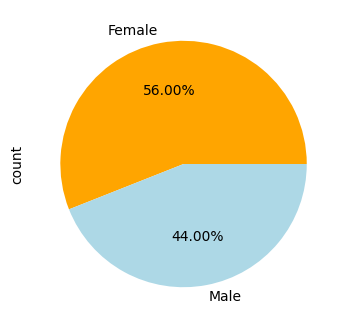

Gender
Female    112
Male       88
Name: count, dtype: int64


In [7]:
plt.figure(figsize=(4,4))
pd.Series(df['Gender']).value_counts().plot(kind ='pie', autopct='%1.2f%%', colors=['orange', 'lightblue'])
plt.show()

print(df['Gender'].value_counts())

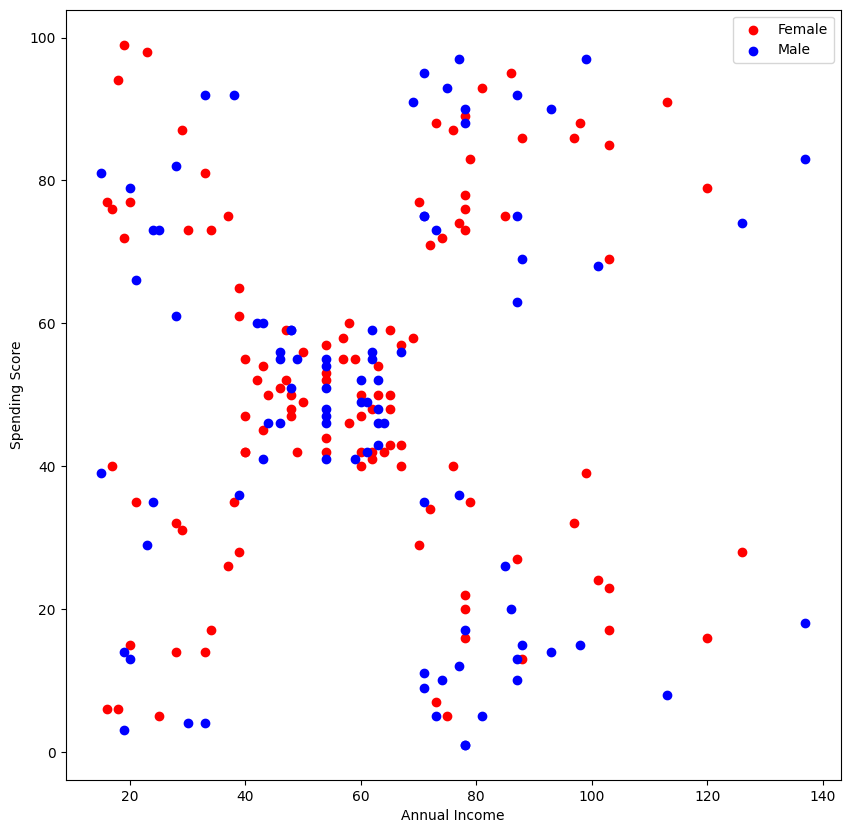

In [8]:
# Income vs spending
plt.figure(figsize = (10, 10))
plt.scatter(female["Annual Income (k$)"], female["Spending Score (1-100)"], label="Female", color='red')
plt.scatter(male["Annual Income (k$)"], male["Spending Score (1-100)"], label="Male", color='blue')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

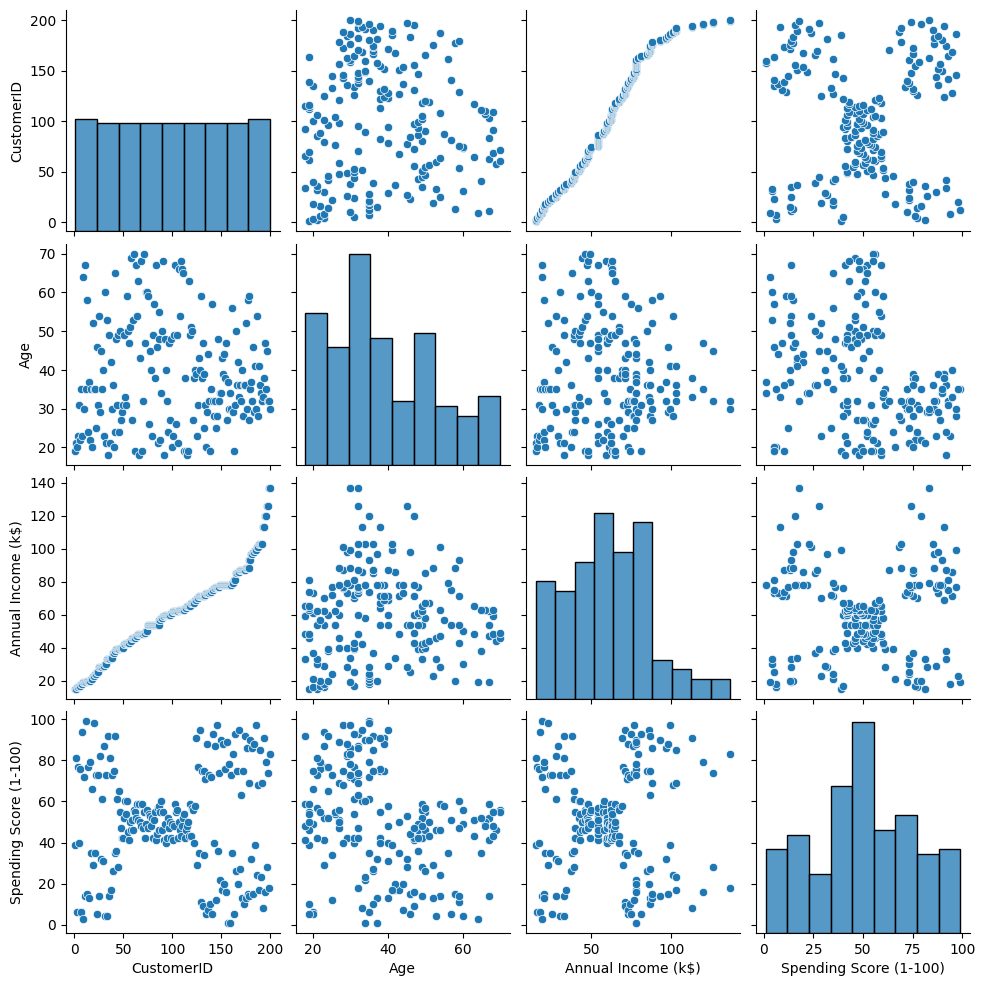

In [9]:
sns.pairplot(df)

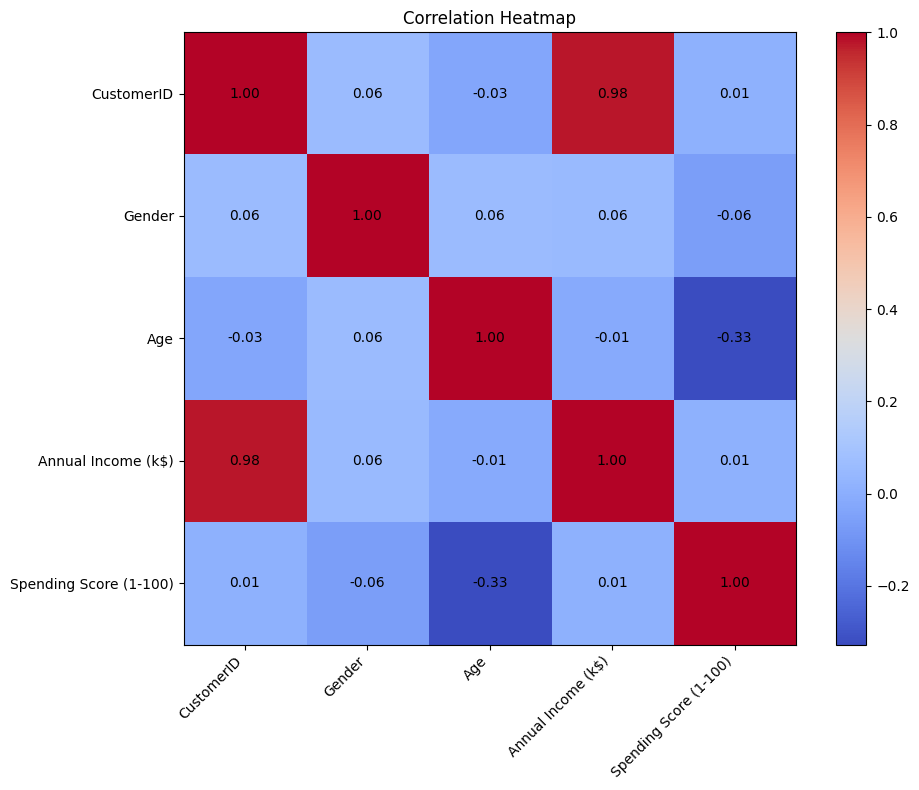

In [10]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

correlation_matrix = df.corr()

# Create a heatmap 
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')


plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Gender has a very low correlation with both "Annual Income (k$)" and "Spending Score (1-100)", indicating that gender has little influence on these variables in this dataset.

Age has a moderate negative correlation with "Spending Score (-0.33)", meaning that as age increases, the spending score tends to decrease. This suggests older customers may have lower spending scores.

Annual Income (k$) shows almost no correlation with "Spending Score (1-100)", indicating that income doesn't have a direct linear relationship with spending score in this dataset.

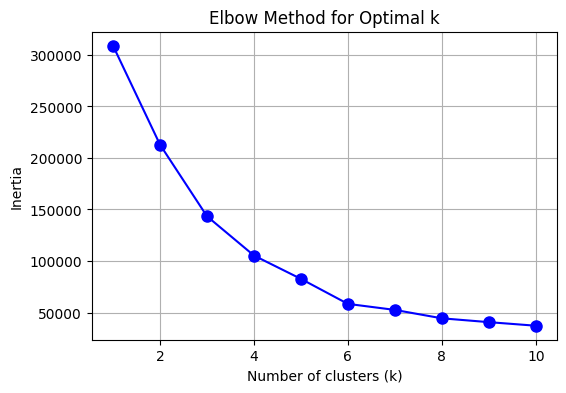

In [11]:
# Select the features for clustering (ignoring CustomerID)
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()
X = X.astype(float)

inertia = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

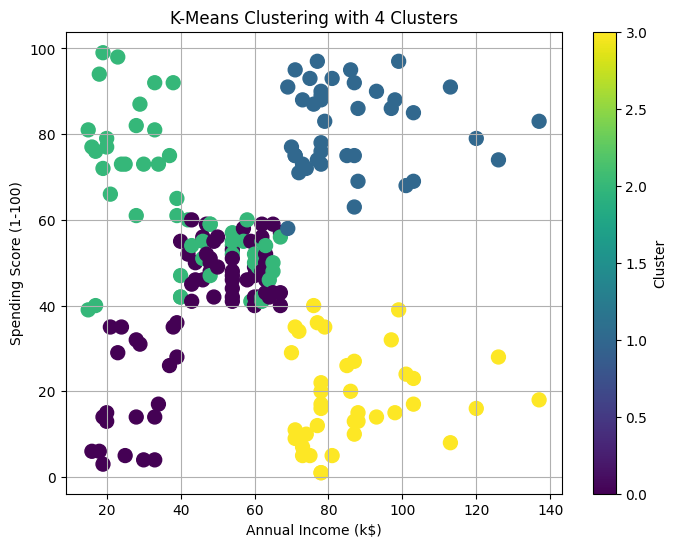

In [25]:
kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Plotting the clusters based on two variables (e.g., Annual Income and Spending Score)
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering with 4 Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

- Yellow Cluster (Cluster 0): These are individuals with high annual income but relatively low spending scores. They may represent high earners who are cautious or selective with their spending.

- Blue Cluster (Cluster 1): This cluster consists of individuals with mid to high income and high spending scores. These are likely high earners who are also heavy spenders.

- Green Cluster (Cluster 2): Individuals in this cluster have low annual income but high spending scores, which could indicate individuals who are financially constrained but are willing to spend a larger proportion of their income.

- Purple Cluster (Cluster 3): This cluster is made up of individuals with both low income and low spending scores, likely representing more conservative spenders.

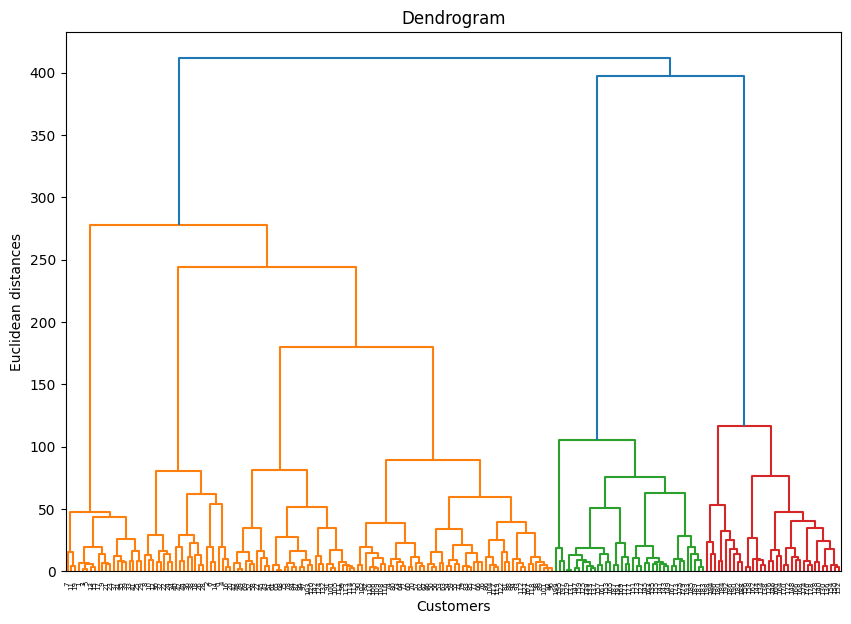

In [29]:
# X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In this graph, about 4 clusters is a reasonable choice because the similarities and differences between clusters are well balanced at this height

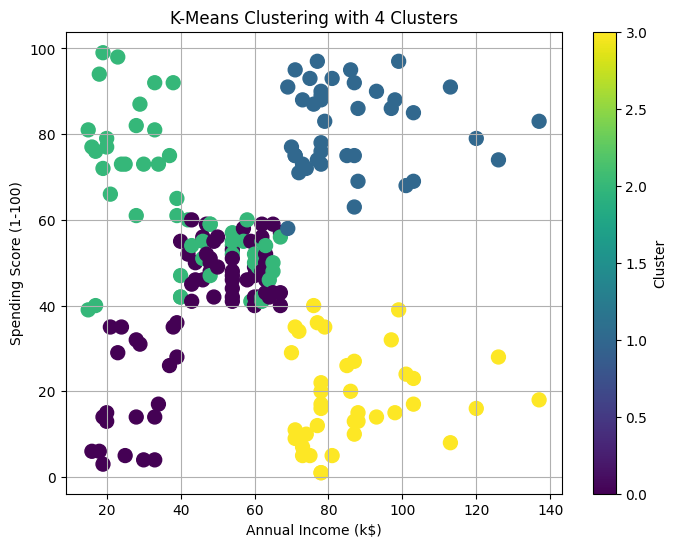

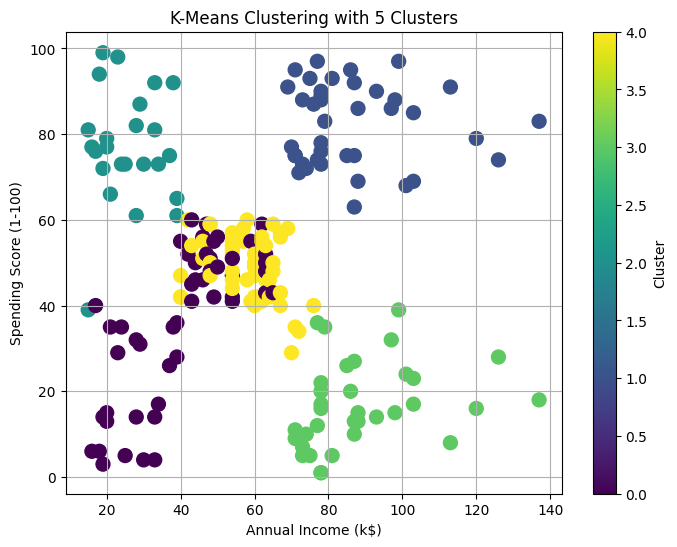

In [33]:
# K-Means = 4
kmeans_4 = KMeans(n_clusters=4, random_state=0)
df['Cluster_4'] = kmeans_4.fit_predict(X)

# K-Means = 5
kmeans_5 = KMeans(n_clusters=5, random_state=0)
df['Cluster_5'] = kmeans_5.fit_predict(X)

# Plotting the clusters with 4 clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster_4'], cmap='viridis', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering with 4 Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Plotting the clusters with 5 clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster_5'], cmap='viridis', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering with 5 Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

5 clusters may be a better choice as it groups customers with annual revenue between 40k and 60k into a separate group and may better suit your needs for data segmentation. If your business goal is to further personalize marketing or services to middle-income customers, then 5 clusters can provide clearer classification results.

____

Further steps: 

Looking at gender separately can further segment your customer base and help you gain a deeper understanding of the distribution and behavioral characteristics of men and women in different clusters. This way you can develop more targeted strategies for different gender customer groups